# Random sample imputation

#replace the nan value

the data are missing completly at random(MCAR)

In [1]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
# percentage
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [8]:
df['Age'].isnull().sum()

177

In [12]:
# changes every time
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
# if random_state=0 is remove then changes

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [13]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [15]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    ## it will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset
    
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [16]:
median=df.Age.median()

In [17]:
median

28.0

In [18]:
impute_nan(df,'Age',median)

In [19]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

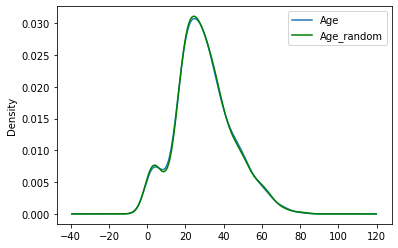

In [24]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
#df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

## Advantage

1.easy to implement

2.there is Less distortion in variance

# Disadvantage 

1.Every situation randomness wont work



## Capturing NAN values with a new features

it works well if data are not missing completly at random

In [26]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [27]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [28]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [30]:
df.Age.median()

28.0

In [31]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [33]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## advantage

1.easy to implemnt

2.capturing the importance of missing values

# Disadvantage

1.creating additional features(curse of Dimensionality)

## End of Distribtion imputation

In [34]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


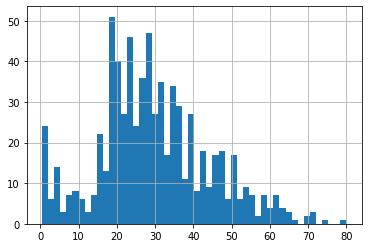

In [35]:
df.Age.hist(bins=50)

In [40]:
extreme=df.Age.mean()+3*df.Age.std()

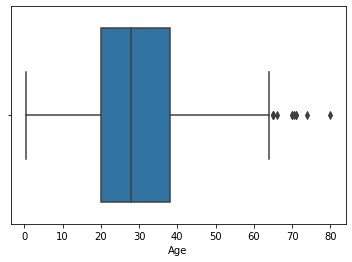

In [39]:
import seaborn as sns
sns.boxplot('Age',data=df)
# outlier

In [41]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [43]:
t=df.Age.median()

In [44]:
t

28.0

In [45]:
impute_nan(df,'Age',t,extreme)

In [46]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


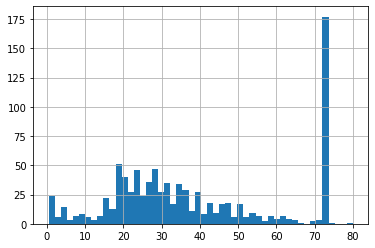

In [47]:
df.Age_end_distribution.hist(bins=50)

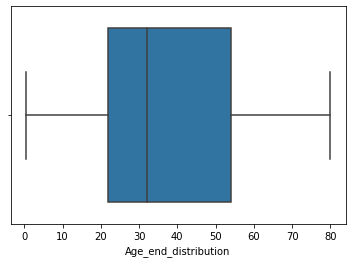

In [48]:
sns.boxplot('Age_end_distribution',data=df)
## Outlier Capture